In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
# from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

In [3]:
class_num = 7
class_names = ["Shoor","Segah","Mahoor","Homayoun","Rast Panjgah","Nava","Chargah"] 

In [4]:

path_data_mfcc = r'/content/gdrive/MyDrive/Tehran University/ML/ML-Project/Data/mfcc/mfccaudio_mfcc_features_20_all_20Sec_cleaned_Amin.pkl'
path_label_mfcc = r'/content/gdrive/MyDrive/Tehran University/ML/ML-Project/Data/mfcc/mfccaudio_mfcc_features_20_all_20Sec_labels_cleaned_Amin.pkl'

path_data_chroma = r"/content/gdrive/MyDrive/Tehran University/ML/ML-Project/Data/chroma/audio_chroma_features_20_all_20Sec_cleaned.pkl"
path_label_chroma = r"/content/gdrive/MyDrive/Tehran University/ML/ML-Project/Data/chroma/audio_chroma_features_20_all_20Sec_labels_cleaned.pkl"

data_mfcc = pd.read_pickle(path_data_mfcc)
data_chroma = pd.read_pickle(path_data_chroma)

# Data extraction
def data_extract(d):
    X=d.copy()
    for i in range(len(X)):
      f1 = np.mean(X[i],axis=0)
      f2 = np.var(X[i],axis=0)
      X[i] = np.append(f1,f2)
    return np.array(X)
  

In [5]:
x_mfcc = data_extract(data_mfcc)
y_mfcc = np.array(pd.read_pickle(path_label_mfcc))

In [6]:
x_chroma = data_extract(data_chroma)
y_chroma = np.array(pd.read_pickle(path_label_chroma))

In [7]:
x_mfcc.shape, y_mfcc.shape

((9538, 40), (9538,))

In [8]:
x_chroma.shape, y_chroma.shape

((9538, 40), (9538,))

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(7,8), max_iter=1000)
cv_results_mfcc = cross_validate(clf, x_mfcc, y_mfcc, cv=5, 
                                scoring='accuracy',
                                return_train_score='true',
                                n_jobs=-1)


clf = MLPClassifier(hidden_layer_sizes=(7, 8), max_iter=1000)
cv_results_chroma = cross_validate(clf, x_chroma, y_chroma, cv=5, 
                                scoring='accuracy',
                                return_train_score='true',
                                n_jobs=-1)


In [10]:
cv_results_mfcc

{'fit_time': array([4.62181997, 2.15394211, 3.27652884, 7.01780248, 5.97736454]),
 'score_time': array([0.00227666, 0.00220942, 0.00223351, 0.00222373, 0.00225544]),
 'test_score': array([0.15932914, 0.15880503, 0.08018868, 0.15941269, 0.11955952]),
 'train_score': array([0.16159895, 0.15897772, 0.17942333, 0.16013629, 0.1855589 ])}

In [11]:
test_cv_mfcc = cv_results_mfcc["test_score"]
print(f"Cross validation (CV= 5) of MFCC (20 feature): mean test score: {test_cv_mfcc.mean():.4f}, std test score: {test_cv_mfcc.std():.4f}")

Cross validation (CV= 5) of MFCC (20 feature): mean test score: 0.1355, std test score: 0.0316


In [12]:
cv_results_chroma

{'fit_time': array([51.00334692, 53.93708682, 26.55428886, 44.36943483, 27.84635115]),
 'score_time': array([0.00276065, 0.00987363, 0.00380778, 0.00939584, 0.00319982]),
 'test_score': array([0.25314465, 0.27515723, 0.28406709, 0.24436287, 0.21447299]),
 'train_score': array([0.47247706, 0.39423329, 0.4112713 , 0.41501769, 0.45616564])}

In [13]:
test_cv_chroma = cv_results_chroma["test_score"]
print(f"Cross validation (CV= 5) of chroma (20 feature): mean test score: {test_cv_chroma.mean():.4f}, std test score: {test_cv_chroma.std():.4f}")

Cross validation (CV= 5) of chroma (20 feature): mean test score: 0.2542, std test score: 0.0245


In [14]:
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(x_mfcc, y_mfcc,stratify=y_mfcc, test_size=0.25)

In [15]:
X_train_chroma, X_test_chroma, y_train_chroma, y_test_chroma = train_test_split(x_chroma, y_chroma,stratify=y_chroma, test_size=0.25)

In [16]:
# clf = SVC(C=0.1)
# clf_mfcc = clf.fit(X_train_mfcc, y_train_mfcc)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(7, 8), max_iter=1000)
clf_mfcc = clf.fit(X_train_mfcc, y_train_mfcc)

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(7, 8), max_iter=1000)
clf_chroma = clf.fit(X_train_chroma, y_train_chroma)

In [19]:
classes_idx = np.unique(y_test_mfcc)

In [20]:
classes_idx

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
y_preds_probs_mfcc = clf_mfcc.predict_proba(X_test_mfcc)
y_pred_mfcc = clf_mfcc.predict(X_test_mfcc)
y_preds_probs_mfcc.shape, y_pred_mfcc.shape

((2385, 7), (2385,))

In [22]:
y_preds_probs_chroma = clf_chroma.predict_proba(X_test_chroma)
y_pred_chroma = clf_chroma.predict(X_test_chroma)
y_preds_probs_chroma.shape, y_pred_chroma.shape

((2385, 7), (2385,))

In [23]:
def calculate_roc_auc_each_class(test_y, predicted_probs):
  class_num = predicted_probs.shape[1]
  fpr, tpr, roc_auc, thr = [0] * class_num , [0] * class_num, [0] * class_num, [0] * class_num 


  for i in range(class_num):
    fpr[i], tpr[i], thr[i] = roc_curve(test_y, predicted_probs[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

  print(len(thr[0]))
  
  return fpr,tpr, roc_auc

In [24]:
calculate_roc_auc_each_class(y_test_mfcc, y_preds_probs_mfcc)

481


([array([0.00000000e+00, 0.00000000e+00, 4.82625483e-04, 4.82625483e-04,
         2.41312741e-03, 2.41312741e-03, 2.89575290e-03, 2.89575290e-03,
         1.20656371e-02, 1.20656371e-02, 1.93050193e-02, 1.93050193e-02,
         2.22007722e-02, 2.22007722e-02, 2.41312741e-02, 2.41312741e-02,
         2.89575290e-02, 2.89575290e-02, 3.13706564e-02, 3.13706564e-02,
         3.47490347e-02, 3.47490347e-02, 3.52316602e-02, 3.52316602e-02,
         3.57142857e-02, 3.57142857e-02, 4.34362934e-02, 4.34362934e-02,
         5.79150579e-02, 5.79150579e-02, 5.98455598e-02, 5.98455598e-02,
         6.17760618e-02, 6.17760618e-02, 6.22586873e-02, 6.22586873e-02,
         6.27413127e-02, 6.27413127e-02, 6.61196911e-02, 6.61196911e-02,
         6.70849421e-02, 6.70849421e-02, 6.80501931e-02, 6.80501931e-02,
         6.90154440e-02, 6.90154440e-02, 6.94980695e-02, 6.94980695e-02,
         7.14285714e-02, 7.14285714e-02, 7.67374517e-02, 7.67374517e-02,
         9.31467181e-02, 9.41119691e-02, 9.60424710

In [25]:
def plot_roc(fpr, tpr, roc_auc, title):
  plt.figure()
  lw = 2
  fig = plt.figure(figsize=(12, 10))

  for i in range(class_num):
      plt.plot(
          fpr[i],
          tpr[i],
          lw=lw,
          label="(postive class %s) ROC (AUC = %0.3f)" % (class_names[i] ,roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()


481


<Figure size 432x288 with 0 Axes>

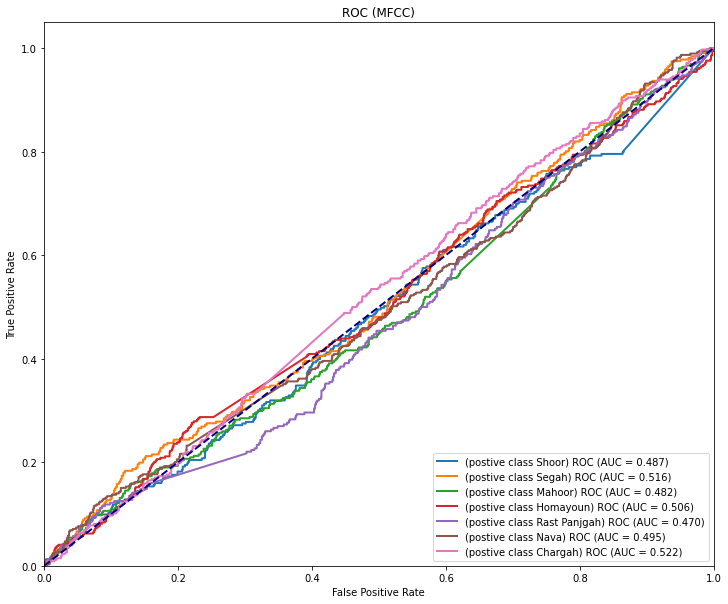

In [26]:
fpr, tpr, roc_auc = calculate_roc_auc_each_class(y_test_mfcc, y_preds_probs_mfcc)
plot_roc(fpr, tpr, roc_auc, "ROC (MFCC)")

555


<Figure size 432x288 with 0 Axes>

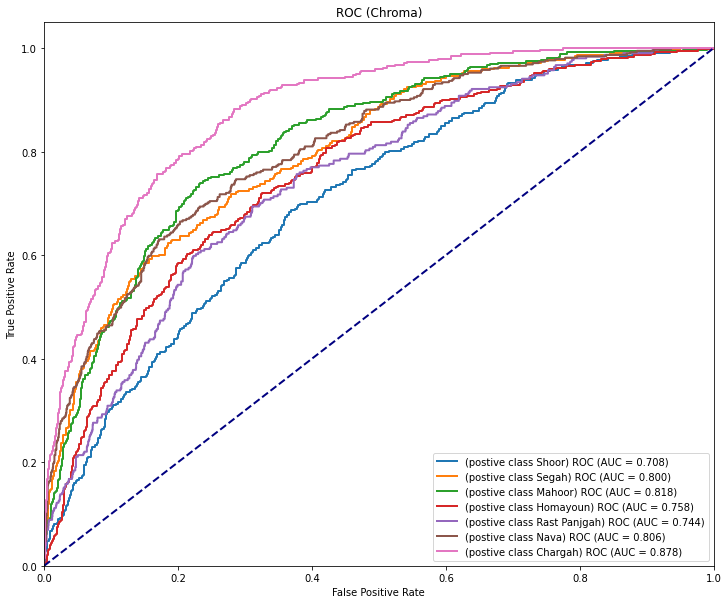

In [27]:
fpr, tpr, roc_auc = calculate_roc_auc_each_class(y_test_chroma, y_preds_probs_chroma)
plot_roc(fpr, tpr, roc_auc, "ROC (Chroma)")

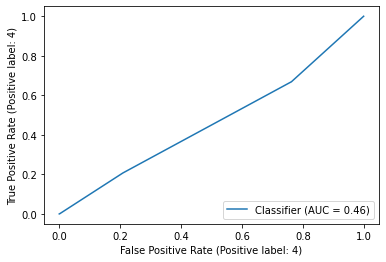

In [28]:
RocCurveDisplay.from_predictions(y_test_mfcc, y_pred_mfcc, pos_label=4)